<a href="https://colab.research.google.com/github/emazakaria/MyFinalYearProject/blob/main/FYP2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wordcloud matplotlib pandas

In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from imblearn.combine import SMOTETomek

import seaborn as sns
import matplotlib.pyplot as plt

import re

from wordcloud import WordCloud

from scipy.sparse import csr_matrix, hstack, vstack, lil_matrix

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Replace 'path_to_file' with the path to your file within Google Drive
file_path = '/content/drive/My Drive/FYP/MH_Campaigns1723.csv'

# Read the dataset using pandas
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.shape

(724756, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724756 entries, 0 to 724755
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          724756 non-null  object 
 1   ID            724756 non-null  int64  
 2   url           724756 non-null  object 
 3   username      724756 non-null  object 
 4   source        724756 non-null  object 
 5   location      724756 non-null  object 
 6   tweet         724756 non-null  object 
 7   likes         724756 non-null  int64  
 8   rt            724756 non-null  int64  
 9   followers     724756 non-null  int64  
 10  replies       724756 non-null  int64  
 11  campaign      724756 non-null  object 
 12  likes_pf      724756 non-null  float64
 13  replies_pf    724756 non-null  float64
 14  rt_pf         724756 non-null  float64
 15  engagement    724756 non-null  float64
 16  engagement_0  724756 non-null  float64
dtypes: float64(5), int64(5), object(7)
memory usage:

In [ ]:
df.describe()

,ID,likes,rt,followers,replies,likes_pf,replies_pf,rt_pf,engagement,engagement_0
count,7.247560e+05,724756.000000,724756.000000,7.247560e+05,724756.000000,7.247560e+05,724756.0,7.247560e+05,724756.000000,724756.000000
mean,1.212629e+18,7.072277,2.342939,1.539511e+04,0.402076,inf,inf,inf,0.015342,0.017171
std,2.093917e+17,143.337525,31.214356,3.137420e+05,7.549365,NaN,NaN,NaN,0.291900,0.434015
min,8.153481e+17,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000
25%,1.000495e+18,0.000000,0.000000,4.330000e+02,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000
50%,1.261968e+18,2.000000,0.000000,1.387000e+03,0.000000,6.508298e-04,0.0,0.000000e+00,0.001433,0.001434
75%,1.392014e+18,5.000000,2.000000,4.364000e+03,0.000000,3.595829e-03,0.0,1.471205e-03,0.006878,0.007579
max,1.636147e+18,74341.000000,11917.000000,8.483486e+07,2570.000000,inf,inf,inf,182.121622,290.979730


In [ ]:
df.head()

,Date,ID,url,username,source,location,tweet,likes,rt,followers,replies,campaign,likes_pf,replies_pf,rt_pf,engagement,engagement_0
0,2023-02-15 13:48:52+00:00,1625854658601418753,https://twitter.com/haringeyiapt/status/162585...,haringeyiapt,Twitter for iPhone,Haringey,"People with OCD experience intensely negative,...",5,1,317,0,OCD,0.015773,0.000000,0.006309,0.022082,0.031546
1,2023-02-09 22:37:56+00:00,1623813475469344769,https://twitter.com/scrupulOCD_KC/status/16238...,scrupulOCD_KC,Twitter for Android,unknown,Hello all I'm Erika an @IOCDF grassroots advoc...,0,0,9,0,OCD,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022-10-20 11:30:07+00:00,1583057973496406016,https://twitter.com/FootstepsCandC/status/1583...,FootstepsCandC,SmarterQueue,Gloucester,"In light of last week's OCD Awareness week, we...",0,0,905,0,OCD,0.000000,0.000000,0.000000,0.000000,0.000000
3,2022-10-18 19:42:14+00:00,1582457044451627008,https://twitter.com/IOCDF/status/1582457044451...,IOCDF,Twitter Web App,"Boston, MA",The GIFS now have over 1.4 million views on GI...,5,2,19257,0,OCD,0.000260,0.000000,0.000208,0.000467,0.000519
4,2022-10-18 19:42:13+00:00,1582457038969262080,https://twitter.com/IOCDF/status/1582457038969...,IOCDF,Twitter Web App,"Boston, MA","The 2022 #OCDweek events, activities, and live...",7,2,19257,1,OCD,0.000364,0.000156,0.000208,0.000727,0.000779


In [ ]:
df.tail()

,Date,ID,url,username,source,location,tweet,likes,rt,followers,replies,campaign,likes_pf,replies_pf,rt_pf,engagement,engagement_0
724751,2017-01-21 16:57:43+00:00,822850673314295808,https://twitter.com/ConorAllanIRL/status/82285...,ConorAllanIRL,Twitter for iPhone,England,Will you join me for Uni Mental Health Day on ...,0,0,440,0,UMHD,0.000000,0.0,0.000000,0.000000,0.000000
724752,2017-01-21 16:30:49+00:00,822843904068321281,https://twitter.com/StudentMindsOrg/status/822...,StudentMindsOrg,Hootsuite,United Kingdom,Over 6million twitter accounts reached using #...,5,6,24929,0,UMHD,0.000201,0.0,0.000481,0.000682,0.000401
724753,2017-01-11 18:19:02+00:00,819247260848553998,https://twitter.com/StudentMindsYSJ/status/819...,StudentMindsYSJ,Twitter Web Client,York,We're excited for #UniMentalHealthDay &amp; wi...,1,1,269,0,UMHD,0.003717,0.0,0.007435,0.011152,0.007435
724754,2017-01-10 11:23:37+00:00,818780330983354368,https://twitter.com/SHUDisabledRep/status/8187...,SHUDisabledRep,Twitter for Android,"Sheffield, England",Lots of stuff happening over coming month btw:...,1,0,204,0,UMHD,0.004902,0.0,0.000000,0.004902,0.009804
724755,2017-01-05 14:37:25+00:00,817017163294867456,https://twitter.com/StudentMindsOrg/status/817...,StudentMindsOrg,Twitter Web Client,United Kingdom,@VibeMedia Interested in supporting us film a ...,0,0,24929,0,UMHD,0.000000,0.0,0.000000,0.000000,0.000000


In [ ]:
# Removes the rows with location unknown
df.drop(df[df['location'] == 'unknown'].index, inplace=True)

In [ ]:
# Removes the rows that contains NULL values.
df=df.dropna()

In [ ]:
#check for null values
df.isnull().sum()

Date            0
ID              0
url             0
username        0
source          0
location        0
tweet           0
likes           0
rt              0
followers       0
replies         0
campaign        0
likes_pf        0
replies_pf      0
rt_pf           0
engagement      0
engagement_0    0
dtype: int64

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Format 'Date' column as day/month/year
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')

df.head()

,Date,ID,url,username,source,location,tweet,likes,rt,followers,replies,campaign,likes_pf,replies_pf,rt_pf,engagement,engagement_0
0,15/02/2023,1625854658601418753,https://twitter.com/haringeyiapt/status/162585...,haringeyiapt,Twitter for iPhone,Haringey,"People with OCD experience intensely negative,...",5,1,317,0,OCD,0.015773,0.000000,0.006309,0.022082,0.031546
2,20/10/2022,1583057973496406016,https://twitter.com/FootstepsCandC/status/1583...,FootstepsCandC,SmarterQueue,Gloucester,"In light of last week's OCD Awareness week, we...",0,0,905,0,OCD,0.000000,0.000000,0.000000,0.000000,0.000000
3,18/10/2022,1582457044451627008,https://twitter.com/IOCDF/status/1582457044451...,IOCDF,Twitter Web App,"Boston, MA",The GIFS now have over 1.4 million views on GI...,5,2,19257,0,OCD,0.000260,0.000000,0.000208,0.000467,0.000519
4,18/10/2022,1582457038969262080,https://twitter.com/IOCDF/status/1582457038969...,IOCDF,Twitter Web App,"Boston, MA","The 2022 #OCDweek events, activities, and live...",7,2,19257,1,OCD,0.000364,0.000156,0.000208,0.000727,0.000779
5,17/10/2022,1582045780688637953,https://twitter.com/IOCDF/status/1582045780688...,IOCDF,Sprout Social,"Boston, MA",Did you catch last week's Ask The Experts live...,5,2,19257,0,OCD,0.000260,0.000000,0.000208,0.000467,0.000519


In [ ]:
# Drop the column to exclude
df = df.drop(columns=['ID','url','username','source','likes', 'rt' , 'replies', 'followers','campaign','likes_pf','replies_pf','rt_pf','engagement','engagement_0'])
df.head()

,Date,location,tweet
0,15/02/2023,Haringey,"People with OCD experience intensely negative,..."
2,20/10/2022,Gloucester,"In light of last week's OCD Awareness week, we..."
3,18/10/2022,"Boston, MA",The GIFS now have over 1.4 million views on GI...
4,18/10/2022,"Boston, MA","The 2022 #OCDweek events, activities, and live..."
5,17/10/2022,"Boston, MA",Did you catch last week's Ask The Experts live...


In [ ]:
df.shape

(628364, 3)

# Keyword-Based Detection

In [ ]:
# Stigma-related keywords
stigma_keywords = ['crazy', 'insane', 'psycho', 'lunatic', 'nutcase', 'schizo', 'bipolar', 'depressive', 'manic', 'neurotic',
                   'unstable', 'weak', 'broken', 'abnormal', 'dangerous', 'attention-seeking', 'faking it', 'imaginary',
                   'made up', 'handwashing', 'cleaning', 'neat', 'psychotic', 'just about', 'attention seeker']

# Function to check if the tweet contains stigma-related keywords
def contains_stigma(tweet):

    # Check for the presence of stigma-related keywords in the tweet
    return any(re.search(r'\b{}\b'.format(keyword), tweet) for keyword in stigma_keywords)

# Filter the DataFrame to include only rows with stigma-related keywords
df = df[df['tweet'].apply(contains_stigma)]

# Display the filtered DataFrame
df.head(10)

,Date,location,tweet
65,12/10/2022,UK,as it's #OCDweek i'd urge anyone to try and be...
231,14/10/2021,1884 Market St San Francisco,This week is OCD Awareness Week. #OCD is not a...
233,14/10/2021,"San Francisco, CA",This week is OCD Awareness Week. #OCD is not a...
279,12/10/2021,"Warren, Ohio",You’ve probably heard someone say “I’m sooooo ...
350,11/10/2021,Everywhere,In honor of #worldmentalhealthday and the star...
386,20/10/2020,india,You are a human who gets thoughts just like ev...
387,20/10/2020,UK,THIS!!! I cannot clearly stress this enough!! ...
429,16/10/2020,"gorseinon, wales, uk",OCD is horrific to live with. And while creati...
452,16/10/2020,Sacramento,I just learned it's #OCDWeek. My story is so s...
457,16/10/2020,"Glendale, CA","To be 100% clear, individuals with POCD do not..."


In [ ]:
df.tail(10)

,Date,location,tweet
720887,01/03/2018,London/Essex,shouts to all the students struggling with the...
721029,01/03/2018,"London, United Kingdom",It's #UniMentalHealthDay. Research shows that ...
721550,28/02/2018,"London, United Kingdom",It's #UniMentalHealthDay tomorrow. Research sh...
721596,28/02/2018,United Kingdom,Tomorrow is #UniMentalHealthDay! Being healthy...
722607,02/03/2017,"Peterborough, England",My love to all students on #UniMentalHealthDay...
722731,02/03/2017,"Lincoln, England","'It is not weak to accept help, in fact it is ..."
722791,02/03/2017,United Kingdom,Pressure on uni students is crazy. More awaren...
722925,02/03/2017,"Auckland, New Zealand",#UniMentalHealthDay in a depressive episode I ...
723015,02/03/2017,West Yorkshire,.@UniofOxford could not have been less support...
724007,02/03/2017,Balham/Bury St Edmunds,"If you need help, ask for it. It doesn't make ..."


In [ ]:
df.shape

(4608, 3)

In [ ]:
# # Randomly select 85 samples to manually label
# random_sample = df.sample(n=85, random_state=42)  # Use a fixed random_state for reproducibility

# # open in csv
# random_sample.to_csv('random_samples.csv', index=False)

In [ ]:
# After manual labeling in Excel, read the labeled data back into Python

# Replace 'path_to_file' with the path to your file within Google Drive
file_path = '/content/drive/My Drive/FYP/labeled_data.csv'

labeled_data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [ ]:
print("the number of rated tweets by category:")

labeled_data.groupby('stigma')['tweet'].nunique()

the number of rated tweets by category:


stigma
0    62
1    17
2     6
Name: tweet, dtype: int64

In [ ]:
# Function to clean unlabeled data
def clean_text(tweet):
    # Remove mentions (@username)
    tweet = re.sub(r'@[\w_]+', '', tweet)

    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)

    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Remove emojis
    tweet = tweet.encode('ascii', 'ignore').decode('ascii')

    # Remove special characters and numbers
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)

    # Remove extra whitespaces
    tweet = re.sub(' +', ' ', tweet)

    # Convert to lowercase
    tweet = tweet.lower()

    return tweet.strip()

# Clean the 'tweet' column
df['tweet'] = df['tweet'].apply(clean_text)

# Convert 'tweet' to lowercase before removing duplicates
df['tweet'] = df['tweet'].str.lower()

# Remove duplicates based on the 'tweet' column
df = df.drop_duplicates(subset='tweet')

# Reset index after removing duplicates
df.reset_index(drop=True, inplace=True)

df.shape

(4347, 3)

In [ ]:
# Combine labeled and unlabeled data
combined_data = pd.concat([labeled_data, df])

# 4347 unlabeled data + 85 labeled data
combined_data.shape

(4432, 4)

In [ ]:
# Function to clean combined data

# Clean the 'tweet' column
combined_data['tweet'] = combined_data['tweet'].apply(clean_text)

combined_data.head()

,Date,location,tweet,stigma
0,9/5/2017,London,i think i have ocd,1.0
1,4/10/2018,"Courtenay, BC",mental health matters lets end the stigma and ...,0.0
2,8/5/2017,"Warwickshire, UK",you are literally psychotic,1.0
3,9/10/2018,Calgary,please continue to join us in recognizing and ...,0.0
4,10/10/2018,Scotland,we are to be signatories of the charter for we...,0.0


**Text Analysis to visualize the most frequent words in the tweets**



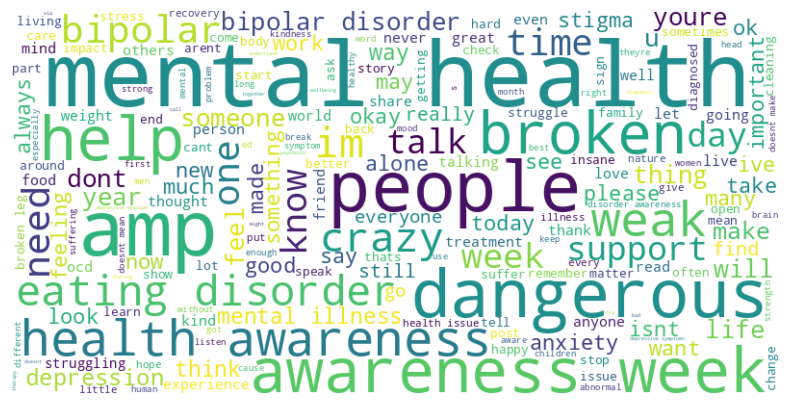

In [ ]:
# Combine all tweets into a single string
all_tweets_text = ' '.join(combined_data['tweet'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Time Series Analysis number of tweets per year**

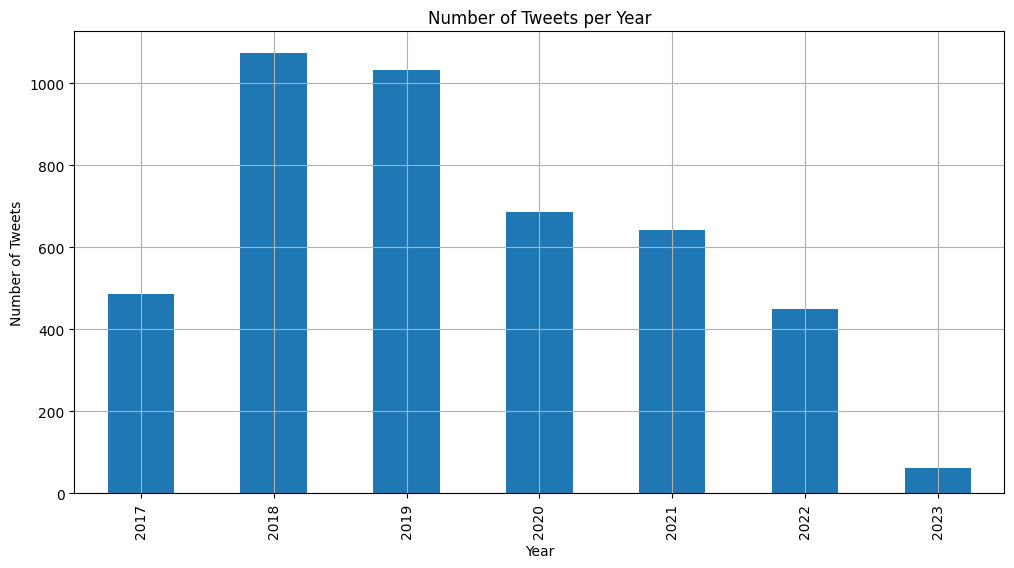

In [ ]:
# Convert 'Date' column to datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'], format='%d/%m/%Y')

# Set the 'Date' column as the index
combined_data.set_index('Date', inplace=True)

# Resample the data to get the count of tweets per year
tweets_per_year = combined_data.resample('Y').size()

# Extract the year from the index
tweets_per_year.index = tweets_per_year.index.year

# Plot the time series
plt.figure(figsize=(12, 6))
tweets_per_year.plot(kind='bar', title='Number of Tweets per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

# Semi supervised learning

In [ ]:
# Preprocessing and feature extraction
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(combined_data['tweet'])

In [ ]:
# Split data back into labeled and unlabeled
X_labeled = X_tfidf[:len(labeled_data)]
X_unlabeled = X_tfidf[len(labeled_data):]

In [ ]:
# For imbalance label in labeled data
# Oversample the labeled data
smk = SMOTETomek(random_state=0)
X_labeled_resampled, y_labeled_resampled = smk.fit_resample(X_labeled, labeled_data['stigma'])

In [ ]:
# Print class distribution after oversampling
print("Class distribution after SMOTETomek:")
print(y_labeled_resampled.value_counts())

Class distribution after SMOTETomek:
1    62
0    62
2    62
Name: stigma, dtype: int64


In [ ]:
# Train-test split for oversampled labeled data
X_train, X_test, y_train, y_test = train_test_split(X_labeled_resampled, y_labeled_resampled, test_size=0.2, random_state=42)

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.text(1.1, 0.5, f'Accuracy: {accuracy:.2f}', transform=plt.gca().transAxes, verticalalignment='center')
    plt.show()

# Support Vector Machine (SVM) Algorithm

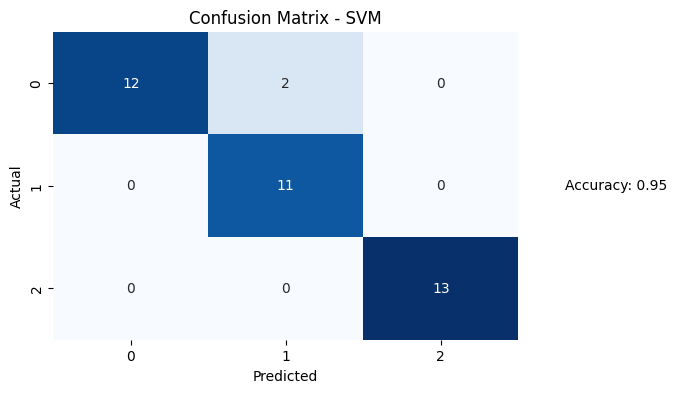

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.85      1.00      0.92        11
           2       1.00      1.00      1.00        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.96      0.95      0.95        38



In [ ]:
# Train and evaluate SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Plot confusion matrix for SVM
plot_confusion_matrix('SVM', y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)
print(svm_report)

# Logistic Regression Algorithm

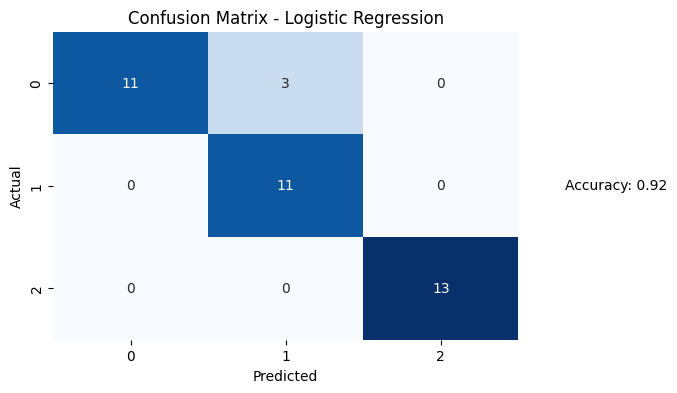

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.79      1.00      0.88        11
           2       1.00      1.00      1.00        13

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.92        38
weighted avg       0.94      0.92      0.92        38



In [ ]:
# Train and evaluate Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix('Logistic Regression', y_test, lr_predictions)
lr_report = classification_report(y_test, lr_predictions)
print(lr_report)

# Naive Bayes Algorithm

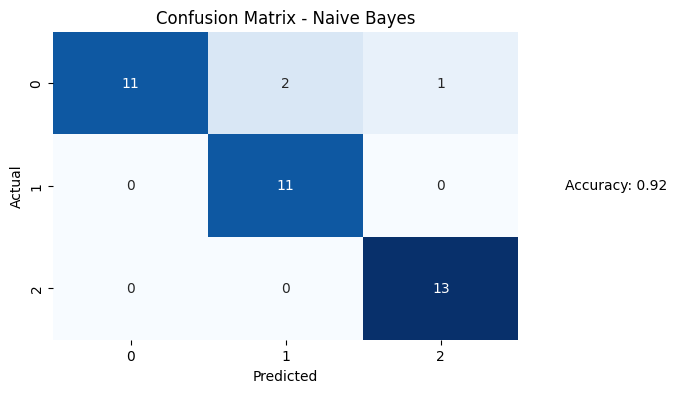

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.85      1.00      0.92        11
           2       0.93      1.00      0.96        13

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.92        38
weighted avg       0.93      0.92      0.92        38



In [ ]:
# Train and evaluate Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix('Naive Bayes', y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)
print(nb_report)

# Random Forest Algorithm

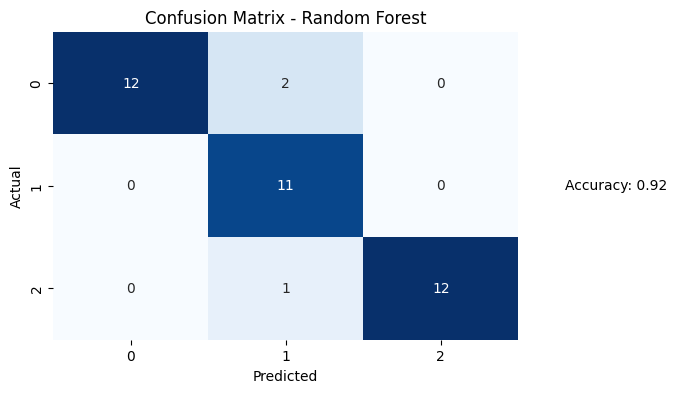

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.79      1.00      0.88        11
           2       1.00      0.92      0.96        13

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.92        38
weighted avg       0.94      0.92      0.92        38



In [ ]:
# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Plot confusion matrix for Random Forest
plot_confusion_matrix('Random Forest', y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

In [ ]:
# Create a DataFrame with algorithm names and accuracies
results_df = pd.DataFrame({
    'Algorithm': ['SVM', 'Logistic Regression', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [svm_accuracy, lr_accuracy, nb_accuracy, rf_accuracy]
})

# Sort the DataFrame by Accuracy in ascending order
results_df.sort_values(by='Accuracy', ascending=False,ignore_index=True)

,Algorithm,Accuracy
0,SVM,0.947368
1,Logistic Regression,0.921053
2,Naive Bayes,0.921053
3,Random Forest,0.921053


# Predict stigma using SVM

In [ ]:
# df is unlabel data
svm_model.fit(X_labeled_resampled, y_labeled_resampled)

# Predict sentiment on unlabeled data
X_unlabeled_predictions = svm_model.predict(X_unlabeled)

# Add the predicted labels to the unlabeled data
df['predicted_stigma'] = X_unlabeled_predictions

# Combine predicted labels with location data
stigma_location_data = df[['Date', 'location', 'tweet', 'predicted_stigma']].copy()

# Filter tweets with stigma
stigma_tweets = stigma_location_data[stigma_location_data['predicted_stigma'] == 1]

In [ ]:
stigma_tweets.shape

(573, 4)

In [ ]:
stigma_tweets.head()

,Date,location,tweet,predicted_stigma
0,12/10/2022,UK,as its id urge anyone to try and be a bit more...,1
1,14/10/2021,1884 Market St San Francisco,this week is ocd awareness week is not all abo...,1
2,12/10/2021,"Warren, Ohio",youve probably heard someone say im sooooo ocd...,1
3,11/10/2021,Everywhere,in honor of and the start of here is me the gu...,1
6,16/10/2020,"gorseinon, wales, uk",ocd is horrific to live with and while creatin...,1


# Getting latitude and longitude

In [ ]:
!pip install opencage

In [ ]:
from opencage.geocoder import OpenCageGeocode

api_key = '0d4c4d3b9cff4e09a705c5c53195e8b2'
geocoder = OpenCageGeocode(api_key)

In [ ]:
# Function to check if location information is empty
def is_location_empty(result):
    return result is None or len(result) == 0 or 'geometry' not in result[0]

# Create empty columns for latitude, longitude, and country
stigma_tweets['latitude'] = None
stigma_tweets['longitude'] = None
stigma_tweets['country'] = None

# Iterate over DataFrame rows and add latitude, longitude, and country
for index, row in stigma_tweets.iterrows():
    location = row['location']

    # Query OpenCage Geocoding API to obtain location information
    results = geocoder.geocode(location)

    if not is_location_empty(results):
        latitude = results[0]['geometry']['lat']
        longitude = results[0]['geometry']['lng']
        country = results[0]['components']['country']

        # Add latitude, longitude, and country to DataFrame
        stigma_tweets.at[index, 'latitude'] = latitude
        stigma_tweets.at[index, 'longitude'] = longitude
        stigma_tweets.at[index, 'country'] = country
    else:
        # If location information is empty, remove the row
        stigma_tweets = stigma_tweets.drop(index)

<ipython-input-43-18fd17d6508b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stigma_tweets['latitude'] = None
<ipython-input-43-18fd17d6508b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stigma_tweets['longitude'] = None
<ipython-input-43-18fd17d6508b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [ ]:
stigma_tweets.shape

(534, 7)

In [ ]:
stigma_tweets.head(10)

,Date,location,tweet,predicted_stigma,latitude,longitude,country
0,12/10/2022,UK,as its id urge anyone to try and be a bit more...,1,54.702354,-3.276575,United Kingdom
1,14/10/2021,1884 Market St San Francisco,this week is ocd awareness week is not all abo...,1,37.771059,-122.424836,United States
2,12/10/2021,"Warren, Ohio",youve probably heard someone say im sooooo ocd...,1,39.420398,-84.180897,United States
3,11/10/2021,Everywhere,in honor of and the start of here is me the gu...,1,39.626226,19.903602,Greece
6,16/10/2020,"gorseinon, wales, uk",ocd is horrific to live with and while creatin...,1,51.66938,-4.041592,United Kingdom
9,13/10/2020,Canada,this week is ocd awareness week among many oth...,1,61.066692,-107.991707,Canada
12,17/10/2019,"Pennsylvania, USA",its ocd awareness week and my boy has had the ...,1,40.969989,-77.727883,United States
13,16/10/2019,United Kingdom,you cant have ocd you dont wash your hands an ...,1,54.702354,-3.276575,United Kingdom
14,16/10/2019,England,many people still think being ocd means being ...,1,52.531021,-1.264906,United Kingdom
15,15/10/2019,"Los Angeles, CA",liking things to be neat is not ocd,1,34.053691,-118.242766,United States


In [ ]:
# Save the DataFrame with latitude, longitude, and country
stigma_tweets.to_csv('stigma_coords_with_country.csv', index=False)